In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
df = pd.read_csv('./Data' )

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0.0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1.0
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1.0
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1.0
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1.0


In [5]:
def cal_diff(df, feature_name,diff_periods = 2):
    _id =1
    feature_diff = []
    feature_diff_temp = []
    # 第0到diff_periods 应该是每一个值-第一个值
    sensor_diff_temp=df.diff(periods=diff_periods)
    for i in range(diff_periods):
        feature_diff.append(df.iloc[i,feature_name]-df.iloc[0,feature_name])
        # 第40个值之后应该是每一个值-向前推40位的值
    for j in range (len(df)-diff_periods):
        feature_diff.append(sensor_diff_temp.iloc[diff_periods+j,feature_name])
        #print(j) 

    return feature_diff

In [6]:
list(df.columns)
feature_name = list(df.columns)
feature_name = feature_name[0:14]
feature_name

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

In [7]:
for i in range(len(feature_name)):
    feature_name_temp = i
    diff = cal_diff(df,feature_name=feature_name_temp) 
    name = str(feature_name_temp)+'_diff'
    df[name] = diff

In [8]:
mean_1 = df.iloc[:, 15:].mean()
std_1 = df.iloc[:, 15:].std()
std_1.replace(0, 1, inplace=True)
df.iloc[:, 15:] = (df.iloc[:, 15:] - mean_1) / std_1

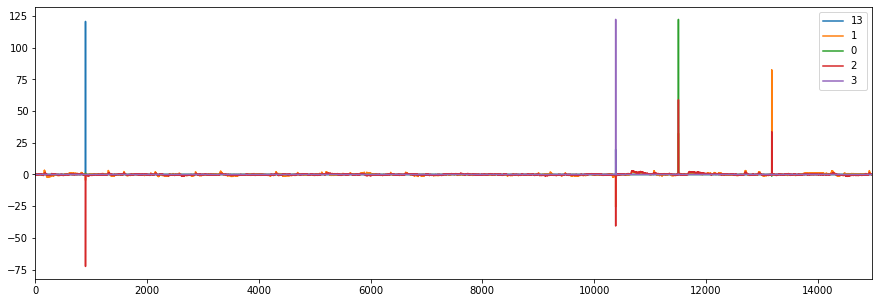

In [25]:
df[['13','1','0','2','3']].plot(figsize=(15,5));

In [10]:
mean = df.iloc[:, :14].mean()
std = df.iloc[:, :14].std()
std.replace(0, 1, inplace=True)
df.iloc[:, :14] = (df.iloc[:, :14] - mean) / std

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,4_diff,5_diff,6_diff,7_diff,8_diff,9_diff,10_diff,11_diff,12_diff,13_diff
0,0.002934,-0.011704,0.567380,-0.003208,0.245228,-0.019787,-0.002930,0.852539,0.001509,0.187743,...,0.000051,-9.767470e-07,2.524731e-07,0.000030,7.024088e-07,0.000043,0.000144,0.000025,0.000003,6.902843e-07
1,0.001084,-0.112048,0.671368,-0.003111,0.008893,-0.019609,-0.002817,0.782214,-0.003771,-0.122105,...,-0.189811,1.247415e-04,8.016570e-05,-0.061461,-3.732834e-03,-0.250495,-0.086389,-0.019527,-0.001800,-1.169452e-03
2,0.002316,-0.067427,0.705806,-0.001636,-0.138781,-0.020662,-0.002930,0.484870,-0.005213,-0.243521,...,-0.308445,-6.198973e-04,2.524731e-07,-0.321451,-4.752274e-03,-0.348670,-0.110975,0.029545,-0.004200,-5.537772e-04
3,0.002730,0.044019,0.728989,-0.001734,0.053224,-0.021014,-0.002817,0.502280,-0.000649,0.106799,...,0.035664,-9.946344e-04,2.524731e-07,-0.244737,2.208387e-03,0.185131,0.074383,0.157210,-0.000295,1.478070e-03
4,0.001698,0.044019,0.636705,-0.002620,0.171247,-0.019609,-0.003152,0.397134,-0.003771,0.335966,...,0.249114,7.436621e-04,-1.565004e-04,-0.076684,1.020143e-03,0.468606,0.148382,0.118105,0.002403,1.108425e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,-0.016407,-0.424619,-0.413757,-0.009207,-0.227154,-0.010142,-0.007722,0.327151,-0.007371,-0.256924,...,0.035664,3.713427e-04,-3.947033e-04,-0.413387,-2.544589e-03,-0.087082,-0.098682,0.029545,-0.001501,6.189773e-05
14976,-0.018056,-0.391316,-0.425237,-0.010386,-0.256804,-0.009793,-0.008057,0.187184,-0.011452,-0.364675,...,0.011845,6.179438e-04,1.570053e-04,-0.321451,-4.411358e-03,-0.054357,-0.271989,-0.225976,-0.002994,-1.169452e-03
14977,-0.017848,-0.413518,-0.390574,-0.009795,-0.242123,-0.009793,-0.008168,0.257167,-0.011934,-0.486091,...,-0.011975,2.456244e-04,-3.147900e-04,-0.061162,-3.226423e-03,-0.185257,-0.259455,-0.216200,-0.000898,-1.217246e-04
14978,-0.014967,-0.391316,-0.286811,-0.008223,-0.212473,-0.009441,-0.006497,0.432297,-0.008812,-0.297396,...,0.035664,2.480421e-04,1.103670e-03,0.214350,1.867470e-03,0.054443,0.074383,0.147434,0.003603,2.093745e-03


In [12]:
split_rate = 0.3
train_size = int(df.shape[0]*(1-split_rate))
train = df.iloc[:train_size,:]
train

,0,1,2,3,4,5,6,7,8,9,...,4_diff,5_diff,6_diff,7_diff,8_diff,9_diff,10_diff,11_diff,12_diff,13_diff
0,0.002934,-0.011704,0.567380,-0.003208,0.245228,-0.019787,-0.002930,0.852539,0.001509,0.187743,...,0.000051,-9.767470e-07,2.524731e-07,0.000030,7.024088e-07,0.000043,0.000144,0.000025,0.000003,6.902843e-07
1,0.001084,-0.112048,0.671368,-0.003111,0.008893,-0.019609,-0.002817,0.782214,-0.003771,-0.122105,...,-0.189811,1.247415e-04,8.016570e-05,-0.061461,-3.732834e-03,-0.250495,-0.086389,-0.019527,-0.001800,-1.169452e-03
2,0.002316,-0.067427,0.705806,-0.001636,-0.138781,-0.020662,-0.002930,0.484870,-0.005213,-0.243521,...,-0.308445,-6.198973e-04,2.524731e-07,-0.321451,-4.752274e-03,-0.348670,-0.110975,0.029545,-0.004200,-5.537772e-04
3,0.002730,0.044019,0.728989,-0.001734,0.053224,-0.021014,-0.002817,0.502280,-0.000649,0.106799,...,0.035664,-9.946344e-04,2.524731e-07,-0.244737,2.208387e-03,0.185131,0.074383,0.157210,-0.000295,1.478070e-03
4,0.001698,0.044019,0.636705,-0.002620,0.171247,-0.019609,-0.003152,0.397134,-0.003771,0.335966,...,0.249114,7.436621e-04,-1.565004e-04,-0.076684,1.020143e-03,0.468606,0.148382,0.118105,0.002403,1.108425e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,-0.006327,-0.033906,0.036409,-0.006256,0.274590,-0.003656,-0.009394,0.344561,-0.000410,0.160937,...,0.083072,2.104804e-03,1.340336e-03,0.397925,4.922483e-03,0.109056,-0.123268,-0.147384,-0.001501,-1.841322e-04
10482,-0.007150,-0.100947,-0.009733,-0.008026,0.053224,-0.004531,-0.010174,0.169773,-0.002812,0.120465,...,-0.201605,2.480421e-04,-7.812396e-05,0.030775,1.188947e-03,0.021930,0.061849,-0.098311,-0.002098,8.623951e-04
10483,-0.009618,-0.089846,-0.055875,-0.007928,0.053224,-0.006812,-0.010398,-0.093092,-0.005690,0.120465,...,-0.177785,-2.232476e-03,-7.097458e-04,-0.382642,-3.732834e-03,-0.032682,0.012437,-0.088344,-0.000898,6.902843e-07
10484,-0.009000,0.055338,0.024929,-0.005470,0.230259,-0.008388,-0.010730,-0.093092,-0.004731,0.160937,...,0.142273,-2.728096e-03,-3.931665e-04,-0.229812,-1.356345e-03,0.032768,0.037263,0.039321,0.003304,6.902843e-07


In [13]:
test = df.iloc[train_size:,:]
test

,0,1,2,3,4,5,6,7,8,9,...,4_diff,5_diff,6_diff,7_diff,8_diff,9_diff,10_diff,11_diff,12_diff,13_diff
10486,-0.007354,-0.011704,0.024929,-0.006159,0.156566,-0.006459,-0.011065,-0.163075,-0.008330,0.012452,...,-0.059151,0.001363,-0.000236,-0.061162,-0.002545,-0.120020,-0.024442,-0.098311,0.000307,-0.000184
10487,-0.009000,-0.022805,0.001746,-0.006847,0.141885,-0.006285,-0.009729,0.099448,-0.004253,0.066590,...,-0.070945,0.001114,0.001340,0.214350,0.001867,0.011093,-0.061803,-0.157352,0.001209,-0.001169
10488,-0.007559,0.021817,0.174835,-0.005863,0.156566,-0.006285,-0.010174,0.152021,-0.003532,0.012452,...,0.000051,0.000122,0.000630,0.275542,0.003393,0.000043,0.160675,0.157402,0.006307,0.000370
10489,-0.006941,-0.022805,0.186539,-0.005766,0.126916,-0.005058,-0.010954,0.064627,-0.007132,0.012452,...,-0.011975,0.000867,-0.000866,-0.030417,-0.002035,-0.043732,0.160916,0.127881,0.004504,0.000986
10490,-0.008382,-0.011704,0.024929,-0.006454,0.112235,-0.005406,-0.010730,0.187184,-0.006411,0.106799,...,-0.035563,0.000620,-0.000393,0.030775,-0.002035,0.076331,-0.086389,-0.137608,-0.003901,-0.000739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,-0.016407,-0.424619,-0.413757,-0.009207,-0.227154,-0.010142,-0.007722,0.327151,-0.007371,-0.256924,...,0.035664,0.000371,-0.000395,-0.413387,-0.002545,-0.087082,-0.098682,0.029545,-0.001501,0.000062
14976,-0.018056,-0.391316,-0.425237,-0.010386,-0.256804,-0.009793,-0.008057,0.187184,-0.011452,-0.364675,...,0.011845,0.000618,0.000157,-0.321451,-0.004411,-0.054357,-0.271989,-0.225976,-0.002994,-0.001169
14977,-0.017848,-0.413518,-0.390574,-0.009795,-0.242123,-0.009793,-0.008168,0.257167,-0.011934,-0.486091,...,-0.011975,0.000246,-0.000315,-0.061162,-0.003226,-0.185257,-0.259455,-0.216200,-0.000898,-0.000122
14978,-0.014967,-0.391316,-0.286811,-0.008223,-0.212473,-0.009441,-0.006497,0.432297,-0.008812,-0.297396,...,0.035664,0.000248,0.001104,0.214350,0.001867,0.054443,0.074383,0.147434,0.003603,0.002094


In [14]:
train.shape[1]

29

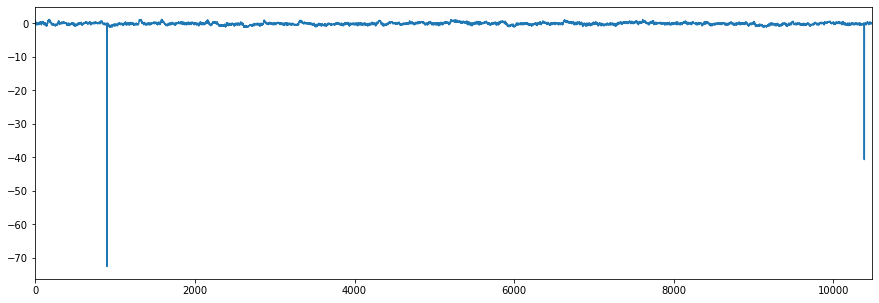

In [18]:
import matplotlib.pyplot as plt
train['2'].plot(figsize=(15,5));

In [30]:
import tensorflow as tf
def batch_generator(training_data, sequence_length=15, window_size = 10):
    """
    Generator function for creating random batches of training-data for many to many models
    """
    feature_number = training_data.shape[1]
    window_number = training_data.shape[0]-window_size+1
    Batch_size = int(window_number/sequence_length)
    temp_data_shape = (window_number,window_size,feature_number)
    temp_data = np.zeros(shape=temp_data_shape)
    for window in range(window_number):
       temp_data[window] = training_data.iloc[window:window+window_size,:]
    #temp_data = tf.reshape(training_data, temp_data_shape)
    
    x_shape = (Batch_size, sequence_length, window_size, feature_number)
    x_batch = np.zeros(shape=x_shape, dtype=np.float32)
    y_shape = (Batch_size,sequence_length)
    y_batch = np.zeros(shape=y_shape, dtype=np.float32)
    
    
    for Batch in range (Batch_size):
        for seq in range(sequence_length):
            y_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,-1,14]
            x_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,:,:]
    x_batch = np.delete(x_batch, 14, axis=3)
    x_batch = np.expand_dims(x_batch, axis=4)
    y_batch = np.expand_dims(y_batch, axis=2)
    return x_batch, y_batch

In [31]:
sequence_length = 3
window_size = 20
kernel_size = 3

In [32]:
x_batch, y_batch= batch_generator(train,sequence_length=sequence_length, window_size=window_size)

In [33]:
x_batch_test, y_batch_test = batch_generator(test,sequence_length=sequence_length, window_size=window_size)

In [34]:
y_batch = tf.keras.utils.to_categorical(y_batch)

In [35]:
y_batch

array([[[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

In [36]:
x_batch_test.shape

(1491, 3, 20, 28, 1)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv3D
#from tensorflow.keras.layers.convolutional_recurrent import ConvLSTM2D
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from ConvLSTM2D_2 import ConvLSTM2D_2

In [38]:
model =Sequential()
# input 的shape 应该是 （时间，行-window，列-sensor， channels）
# 参数个数怎么算？？？为啥改变filter个数，参数个数不是按比例增长
# 增加batch ？ 增加 dropout??
model.add(ConvLSTM2D_2(filters=10, kernel_size=(kernel_size, x_batch.shape[3]),input_shape=(None, window_size, x_batch.shape[3], 1), padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(ConvLSTM2D_2(filters=10, kernel_size=(kernel_size, 1),padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Reshape((100,10)))
#model.add(self_attention())
#model.add(keras.layers.BatchNormalization())
model.add(TimeDistributed(Flatten()))
#model.add(Flatten())

model.add(TimeDistributed(Dense(units = 50, activation = "linear")))
model.add(tf.compat.v2.keras.layers.Dropout(0.4))
#model.add(TimeDistributed(Dense(units = 2, activation = "softmax")))
model.add(TimeDistributed(Dense(units = 2, activation = "sigmoid")))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D_2 (None, None, 16, 1, 10)   39700     
_________________________________________________________________
batch_normalization (BatchNo (None, None, 16, 1, 10)   40        
_________________________________________________________________
conv_lst_m2d_2_1 (ConvLSTM2D (None, None, 12, 1, 10)   5140      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 12, 1, 10)   40        
_________________________________________________________________
time_distributed (TimeDistri (None, None, 120)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 50)          6050      
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0

In [ ]:
model.fit(x_batch,y_batch, batch_size=5, epochs=30, validation_split=0.1)

Train on 3140 samples, validate on 349 samples
Epoch 1/30
3140/3140 [==============================] - 19s 6ms/sample - loss: 0.6601 - binary_accuracy: 0.6092 - val_loss: 1.0513 - val_binary_accuracy: 0.0134
Epoch 2/30
3125/3140 [============================>.] - ETA: 0s - loss: 0.5806 - binary_accuracy: 0.6857

In [ ]:
y_batch_pred = model.predict(x_batch_test)

In [ ]:
y = model.predict(x_batch)

In [ ]:
y_batch_pred.shape

In [ ]:
y_batch_pred_temp = np.zeros(y_batch_test.shape,dtype=float)
for i in range(y_batch_pred.shape[0]):
    for j in range(y_batch_pred.shape[1]):
        if y_batch_pred[i,j,0]>= y_batch_pred[i,j,1]:
            y_batch_pred_temp[i,j,0] = 0
        else :
            y_batch_pred_temp[i,j,0] = 1
    
#     y_batch_test_new[i] = y_batch_test[i,4,0]
#     y_batch_pred_new[i] = y_batch_pred_temp[i,4,0]

In [ ]:
y_batch_test_new = tf.keras.utils.to_categorical(y_batch_test)

In [ ]:
y_batch_pre_new = tf.keras.utils.to_categorical(y_batch_pred_temp)

In [ ]:
m = tf.keras.metrics.BinaryCrossentropy()
m.update_state(y, y_batch)
print('Final result: ', m.result().numpy())

In [ ]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_batch_test_new, y_batch_pre_new)
print('Final result: ', m.result().numpy())  